In [1]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os

In [2]:
'''
#!pip install livelossplot
!python -m pip install --upgrade pip
%matplotlib inline
!pip install Livelossplot
'''

'\n#!pip install livelossplot\n!python -m pip install --upgrade pip\n%matplotlib inline\n!pip install Livelossplot\n'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#!pip install livelossplot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#!pip install Livelossplot
#from Livelossplot import PlotLossesKeras

from glob import glob
import os
import shutil

import numpy as np
import pandas as pd
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
sampling_seed=0
size_4_training=78786
size_4_training_0=120000
size_4_training_1=78786
epoch_4_test=30
img_size=50
#training_reshape=(-1, img_size, img_size, 3)

# **Loading Training Files**

I have converted all images to numpy array to boost speed

In [5]:

os.makedirs('../working/data/train_seg/idc-minus/')     
os.makedirs('../working/data/train_seg/idc-plus/')  
os.makedirs('../working/data/test_seg/idc-minus/')     
os.makedirs('../working/data/test_seg/idc-plus/')  
os.makedirs('../working/data/val_seg/idc-minus/')     
os.makedirs('../working/data/val_seg/idc-plus/')  
os.mkdir('./History')

In [6]:
import random
from sklearn.model_selection import train_test_split

import shutil
from glob import glob 
#make directory for labelling

train_dir='../working/data/train_seg/'
validation_dir='../working/data/val_seg/'
#train_dir='../working/data/train_seg/'  
#test_dir = '../working/data/test_seg/normal'  
test_dir = '../working/data/test_seg/'  

class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model

random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training_0)
class0label=np.zeros(size_4_training_0)
class1sample=random.sample(class1,size_4_training_1)
class1label=np.ones(size_4_training_1)

class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val, class0sample_test, class0label_val, class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val, class1sample_test, class1label_val, class1label_test = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            #print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
   
class0train_path='../working/data/train_seg/idc-minus/'
class1train_path='../working/data/train_seg/idc-plus/'
class0test_path='../working/data/test_seg/idc-minus/'
class1test_path='../working/data/test_seg/idc-plus/'
class0val_path='../working/data/val_seg/idc-minus/'
class1val_path='../working/data/val_seg/idc-plus/'

read_and_save_data(class0train_path,class0sample_train)
read_and_save_data(class1train_path,class1sample_train)


read_and_save_data(class0test_path,class0sample_test)
read_and_save_data(class1test_path,class1sample_test)


read_and_save_data(class0val_path,class0sample_val)
read_and_save_data(class1val_path,class1sample_val)

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/102

In [7]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)


In [8]:
import os
import cv2
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)

def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    combined_label= np.concatenate((label0,label1), axis=0)
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data)
    combined_label=to_categorical(combined_label,num_classes=2)
    #i=0
    #for i in range(length):
    #    print(combined_label[i])



    #print(class0_array.shape)
    #print(combined_data.shape)
    '''
    training_reshape=(224,224,3)
    length=len(combined_data)
    print(length)
    x =[None]*length
    #print(img_data.type)
    y =np.zeros(length)
    i=0
   
    for features,label in combined_data:
        x[i]=features
        #print(x.shape)
        y[i]=label
        #print(y[i])
        i=i+1
    
            #x = np.array(x).reshape(training_reshape)
    x = np.array(x)    
    #print(x.shape)
    #y=np.array(y)
    y=y.astype(int)
    y = to_categorical(y)
    print(y)
    '''  
    return combined_data, combined_label


X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)

(139150, 50, 50, 3)
(17891, 50, 50, 3)
(41745, 50, 50, 3)


In [9]:
'''
import numpy as np


class0_array = readImage(class0path, 0)
class1_array = readImage(class1path, 1)

class0_array=np.array(class0_array)
class1_array=np.array(class1_array)
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)
print(class0_array.shape)
print(class1_array.shape)

X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)
#print(X.shape)
#print(y.shape)

# reshape X data
train_data = np.array(X).reshape(training_reshape)
train_label=np.array(y)
print(y[19990:19999])
print(train_data.shape)
print(train_label.shape)
'''

'\nimport numpy as np\n\n\nclass0_array = readImage(class0path, 0)\nclass1_array = readImage(class1path, 1)\n\nclass0_array=np.array(class0_array)\nclass1_array=np.array(class1_array)\ncombined_data = np.concatenate((class0_array, class1_array))\nrandom.seed(41)\nrandom.shuffle(combined_data)\nprint(class0_array.shape)\nprint(class1_array.shape)\n\nX = []\ny = []\n\nfor features,label in combined_data:\n    X.append(features)\n    y.append(label)\n#print(X.shape)\n#print(y.shape)\n\n# reshape X data\ntrain_data = np.array(X).reshape(training_reshape)\ntrain_label=np.array(y)\nprint(y[19990:19999])\nprint(train_data.shape)\nprint(train_label.shape)\n'

In [10]:
'''
label_normal = np.zeros(len(normal))
label_bacterial = np.ones(len(bacterial))
label_viral = np.full(len(viral),2, dtype = int)
train_data = np.concatenate((normal,bacterial,viral),axis=0)
train_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)
train_label.shape, train_data.shape
'''

'\nlabel_normal = np.zeros(len(normal))\nlabel_bacterial = np.ones(len(bacterial))\nlabel_viral = np.full(len(viral),2, dtype = int)\ntrain_data = np.concatenate((normal,bacterial,viral),axis=0)\ntrain_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)\ntrain_label.shape, train_data.shape\n'

In [11]:
'''
#!pip install sklearn
from sklearn.model_selection import train_test_split
train_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)
val_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)
'''

'\n#!pip install sklearn\nfrom sklearn.model_selection import train_test_split\ntrain_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)\nval_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)\n'

In [12]:
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

## Visualization

In [13]:
import matplotlib.pyplot as plt

### Normal

In [14]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
       '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n      "

# Viral

In [15]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [16]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

# Loading Test Data

In [17]:
'''
test_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')
test_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')
test_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')

test_normal.shape, test_viral.shape , test_bacterial.shape

label_test_normal = np.zeros(len(test_normal))
label_test_bacterial = np.ones(len(test_bacterial))
label_test_viral = np.full(len(test_viral),2, dtype = int)

test_data.shape
'''

"\ntest_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')\ntest_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')\ntest_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')\n\ntest_normal.shape, test_viral.shape , test_bacterial.shape\n\nlabel_test_normal = np.zeros(len(test_normal))\nlabel_test_bacterial = np.ones(len(test_bacterial))\nlabel_test_viral = np.full(len(test_viral),2, dtype = int)\n\ntest_data.shape\n"

## Visualization

## Normal

In [18]:
 '''

n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\n\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Viral

In [19]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [20]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

**Label encode**

In [21]:
'''
from tensorflow.keras.utils import to_categorical
y_label=train_label
train_label = to_categorical(train_label, num_classes= 2)
test_label  = to_categorical(test_label, num_classes = 2)
'''

'\nfrom tensorflow.keras.utils import to_categorical\ny_label=train_label\ntrain_label = to_categorical(train_label, num_classes= 2)\ntest_label  = to_categorical(test_label, num_classes = 2)\n'

# Dealing with Class Imbalance

In [22]:
'''
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
print(class_weights)

weights = {i : class_weights[i] for i in range(5)}
#five will give an error
#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}
print(weights)
'''

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nprint(class_weights)\n\nweights = {i : class_weights[i] for i in range(5)}\n#five will give an error\n#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}\nprint(weights)\n"

In [23]:
'''
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
weight = {i : weight[i] for i in range(2)}
#the 2 must be equal to classes no
print(weight)

'''

"\nfrom sklearn.utils import class_weight\nweight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nweight = {i : weight[i] for i in range(2)}\n#the 2 must be equal to classes no\nprint(weight)\n\n"

# [CovXNet: A multi-dilation convolutional neural network for automatic COVID-19 and other pneumonia detection from chest X-ray images with transferable multi-receptive feature optimization](https://www.sciencedirect.com/science/article/pii/S0010482520302250)

#### Code:[here](https://github.com/Perceptron21/CovXNet)
## Residual & Shifter Unit:
![Residual & Shifter Unit](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr2.jpg)

## Model:
![Model](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr4.jpg)


## Residual Unit

In [24]:
def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)
  
    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x
  
  return x


## Shifter Unit

In [25]:
# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x

# Network128

In [26]:
from tensorflow.keras.optimizers import Adam

In [27]:
#Network:
  
def Network128(input_shape, nb_class, depth):
  xin = Input(shape= input_shape)

  x = Conv2D(16, kernel_size = (5,5), strides= (1,1), padding = 'same', activation='relu')(xin)
  x = BatchNormalization()(x)

  x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same', activation='relu')(x)
  x = BatchNormalization()(x)
  
##Max Dilation rate will be vary in the range (1,5). 

# Max Dilation rate is 5 for tensor (64x64x32)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5)


# Max Dilation rate is 4 for (32x32x64)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4)

# Max Dilation rate is 3 for (16x16x128)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3)

# Max Dilation rate is 2 for (8x8x256)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=256, max_dilation=2, number_of_units=depth)

  x = GlobalAveragePooling2D()(x)
  #x = GlobalMaxPooling2D()(x)

  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)

  x = Dense(nb_class, activation= 'softmax')(x)

  model = Model(xin, x)

  model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 1e-4), metrics = ['accuracy'])

  return model

# Custom Callback

In [28]:
# plot confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas.util.testing as tm
from sklearn import metrics
import seaborn as sns
sns.set()

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save = False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=False)
    if save == True:
      plt.savefig('Confusion Matrix.png', dpi = 900)

In [29]:
# test model performance
from datetime import datetime
import matplotlib.pyplot as plt


def test_model(model, test_generator, y_test, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_original>0.5).astype('int')

    y_pred = np.argmax(y_pred_original, axis = 1)
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred, digits=6)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    
    return


from keras.callbacks import Callback
class MyLogger(Callback):
  
  def __init__(self, test_generator, y_test, class_labels):
    super(MyLogger, self).__init__()
    self.test_generator = test_generator
    self.y_test = y_test
    self.class_labels = class_labels
    
  def on_epoch_end(self, epoch, logs=None):
    test_model(self.model, self.test_generator, self.y_test, self.class_labels)

In [30]:
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_test_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_test>0.5).astype('int')

    y_pred_test = np.argmax(y_pred_test_original, axis = 1)
    
    y_train = y_train.astype(int) # sparse form not categorical
    y_val = y_val.astype(int) # sparse form not categorical
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred_test
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred_test)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred_test, digits=6)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_test)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    print("calculate other score")
    print("predicting validation data")

    #calculate other score
    y_pred_val_original = model.predict_generator(val_generator,verbose=1)
    # y_pred = (y_pred_val>0.5).astype('int')

    y_pred_val = np.argmax(y_pred_val_original, axis = 1)
    # y_val = np.argmax(valy, axis= 1)
    #y_val = np.argmax(valy, axis=-1)
    print("predicting test data")
    y_pred_train_original = model.predict_generator(train_generator,verbose=1)
    # y_pred = (y_pred_train>0.5).astype('int')

    y_pred_train = np.argmax(y_pred_train_original, axis = 1)
    # y_train = np.argmax(trainy, axis= 1)
    #y_train = np.argmax(trainy, axis=-1)
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(y_train, y_pred_train)*100), "%")
    
    print("Val accuracy Score--------->")
    
    print("{0:.3f}".format(accuracy_score(y_val, y_pred_val)*100), "%")
    

    
  
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, y_pred_test)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, y_pred_test)*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, y_pred_test)
    cf_matrix_val = confusion_matrix(y_val, y_pred_val)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()
    
    
    return

# One Hot Encoding the labels

# ImageDataGenerator

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import *


#train_datagen2 = ImageDataGenerator(rescale = 1/255)

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  fill_mode = 'constant',
                                  zoom_range = 0.1,
                                  rotation_range = 20)

val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val2_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow(train_data,
                                     train_label, 
                                     batch_size = 16, 
                                     shuffle = False)

val_generator = val_datagen.flow(test_data,
                                 test_label,
                                 batch_size = 16,
                                 shuffle = False)
val2_generator = val_datagen.flow(val_data,
                                 val_label,
                                 batch_size = 16,
                                 shuffle = False)

# Vizualization After Augmentation

In [32]:
#get the first patch for visualization
images, labels = train_generator.next()

In [33]:
#get the augmented data
#train_data1=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
train_label1=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
#print(train_data1.shape)
print(train_label1.shape)
#print(y)

(139150, 2)


100%|██████████| 3/3 [00:00<00:00, 210.36it/s]


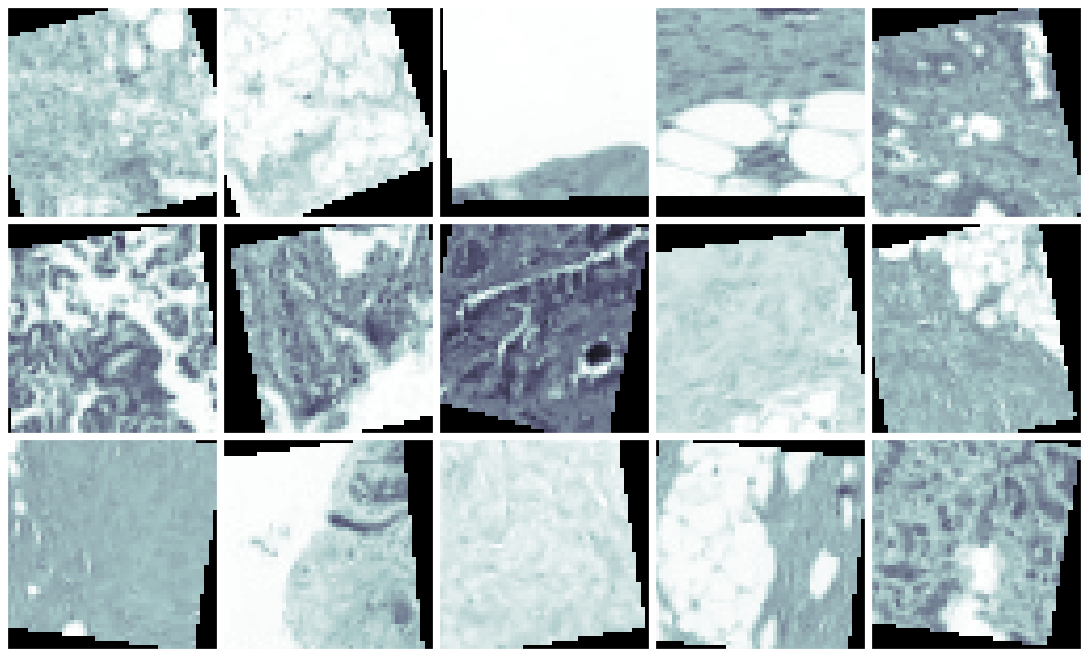

In [34]:
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(images[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Callback

In [35]:
#os.mkdir('Model')


In [36]:
#os.mkdir('History')
def get_callbacks():
    
#    filepath = './Model/best_model_multiclass_128.hdf5'
    filepath = 'best_model_multiclass_128.h5'
    callback1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    #callback1 = ModelCheckpoint(filepath, verbose=1, save_best_only=True, mode='min')
    callback2 = MyLogger(val_generator, 
                         y_test = np.argmax(test_label, axis = 1),
                         class_labels = ['idc-', 'idc+'])
    
    callback3 = CSVLogger('./History/Multiclass_Log_128.csv')

    return [callback1 ,callback2, callback3]

# Training

In [37]:
model = Network128(input_shape = (img_size, img_size, 3), nb_class = 2, depth = 5)
model.summary() 

2022-12-30 06:19:28.869904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 06:19:28.979870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 06:19:28.980656: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 06:19:28.982625: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 50, 50, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 25, 25, 32)   4640        batch_normalization[0][0]        
______________________________________________________________________________________________

# Plotting Model

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

load weight success
Epoch 1/30


2022-12-30 06:19:48.222247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-30 06:20:02.808877: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8696/8696 [==============================] - 1083s 122ms/step - loss: 0.2282 - accuracy: 0.9063 - val_loss: 0.2535 - val_accuracy: 0.8932

Epoch 00001: val_accuracy improved from -inf to 0.89322, saving model to best_model_multiclass_128.h5
Predicting test data
1119/1119 [==============================] - 26s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:25.815063


---------------------
| Balanced Accuracy  |
---------------------

    0.8930512595517531


---------------------
|      Accuracy      |
---------------------

    0.8931865183611872


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.926740  0.893704  0.909922     10800
           1   0.846442  0.892399  0.868813      7091

    accuracy                       0.893187     17891
   macro avg   0.886591  0.893051  0.889368     17891
weighted avg   0.894914  0.893187  0.893629     17891

--------------------
| Confusion Ma

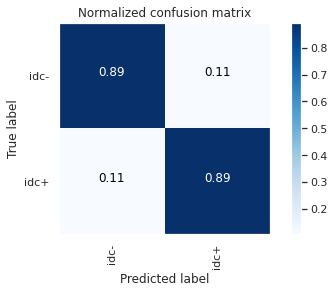

Epoch 2/30
8696/8696 [==============================] - 1068s 123ms/step - loss: 0.2227 - accuracy: 0.9084 - val_loss: 0.2573 - val_accuracy: 0.8929

Epoch 00002: val_accuracy did not improve from 0.89322
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:24.049726


---------------------
| Balanced Accuracy  |
---------------------

    0.8935704622970171


---------------------
|      Accuracy      |
---------------------

    0.8929070482365435


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.929262  0.890370  0.909400     10800
           1   0.843033  0.896771  0.869072      7091

    accuracy                       0.892907     17891
   macro avg   0.886147  0.893570  0.889236     17891
weighted avg   0.895086  0.892907  0.893416     17891

--------------------
| Confusion Matrix |
--------------------

 [[9616

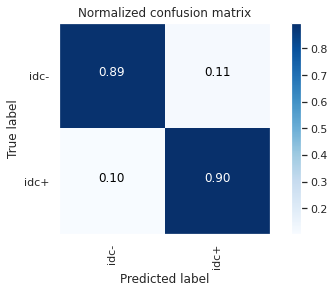

Epoch 3/30
8696/8696 [==============================] - 1077s 124ms/step - loss: 0.2203 - accuracy: 0.9097 - val_loss: 0.2538 - val_accuracy: 0.8940

Epoch 00003: val_accuracy improved from 0.89322 to 0.89401, saving model to best_model_multiclass_128.h5
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.740068


---------------------
| Balanced Accuracy  |
---------------------

    0.8944500919266467


---------------------
|      Accuracy      |
---------------------

    0.8939690347101895


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.929391  0.892130  0.910379     10800
           1   0.845162  0.896771  0.870202      7091

    accuracy                       0.893969     17891
   macro avg   0.887277  0.894450  0.890291     17891
weighted avg   0.896008  0.893969  0.894455     17891

--------------------


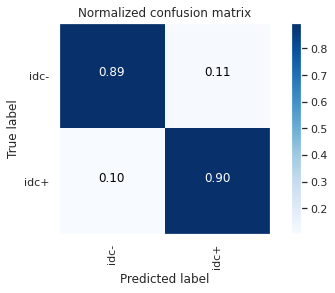

Epoch 4/30
8696/8696 [==============================] - 1068s 123ms/step - loss: 0.2184 - accuracy: 0.9113 - val_loss: 0.2560 - val_accuracy: 0.8946

Epoch 00004: val_accuracy improved from 0.89401 to 0.89457, saving model to best_model_multiclass_128.h5
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.989651


---------------------
| Balanced Accuracy  |
---------------------

    0.8951552110917855


---------------------
|      Accuracy      |
---------------------

    0.8945279749594768


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.930289  0.892130  0.910810     10800
           1   0.845368  0.898181  0.870974      7091

    accuracy                       0.894528     17891
   macro avg   0.887828  0.895155  0.890892     17891
weighted avg   0.896631  0.894528  0.895021     17891

--------------------


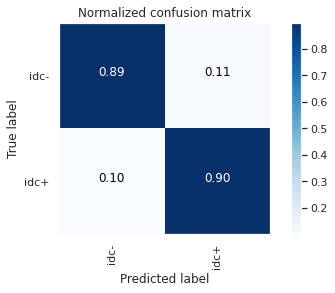

Epoch 5/30
8696/8696 [==============================] - 1077s 124ms/step - loss: 0.2160 - accuracy: 0.9116 - val_loss: 0.2541 - val_accuracy: 0.8933

Epoch 00005: val_accuracy did not improve from 0.89457
Predicting test data
1119/1119 [==============================] - 25s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:24.955755


---------------------
| Balanced Accuracy  |
---------------------

    0.8940398300923967


---------------------
|      Accuracy      |
---------------------

    0.8932983064110447


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.929808  0.890463  0.909710     10800
           1   0.843270  0.897617  0.869595      7091

    accuracy                       0.893298     17891
   macro avg   0.886539  0.894040  0.889652     17891
weighted avg   0.895509  0.893298  0.893811     17891

--------------------
| Confusion Matrix |
--------------------

 [[9617

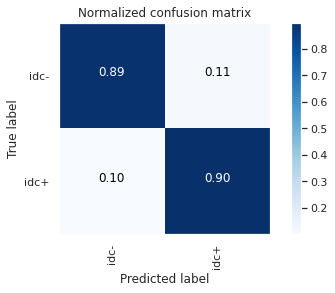

Epoch 6/30
8696/8696 [==============================] - 1077s 124ms/step - loss: 0.2144 - accuracy: 0.9124 - val_loss: 0.2571 - val_accuracy: 0.8942

Epoch 00006: val_accuracy did not improve from 0.89457
Predicting test data
1119/1119 [==============================] - 25s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.010909


---------------------
| Balanced Accuracy  |
---------------------

    0.8943468246133597


---------------------
|      Accuracy      |
---------------------

    0.8941367167849756


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.928585  0.893333  0.910618     10800
           1   0.846420  0.895360  0.870203      7091

    accuracy                       0.894137     17891
   macro avg   0.887503  0.894347  0.890411     17891
weighted avg   0.896020  0.894137  0.894600     17891

--------------------
| Confusion Matrix |
--------------------

 [[9648

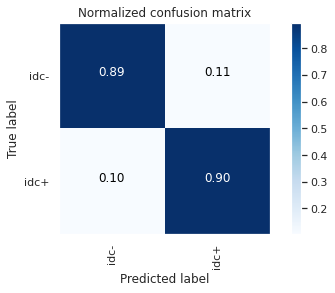

Epoch 7/30
8696/8696 [==============================] - 1085s 125ms/step - loss: 0.2124 - accuracy: 0.9132 - val_loss: 0.2589 - val_accuracy: 0.8907

Epoch 00007: val_accuracy did not improve from 0.89457
Predicting test data
1119/1119 [==============================] - 25s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.015805


---------------------
| Balanced Accuracy  |
---------------------

    0.8930746851773506


---------------------
|      Accuracy      |
---------------------

    0.8906712872393941


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.933699  0.881481  0.906839     10800
           1   0.833658  0.904668  0.867713      7091

    accuracy                       0.890671     17891
   macro avg   0.883679  0.893075  0.887276     17891
weighted avg   0.894049  0.890671  0.891332     17891

--------------------
| Confusion Matrix |
--------------------

 [[9520

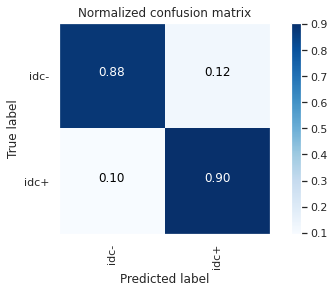

Epoch 8/30
8696/8696 [==============================] - 1098s 126ms/step - loss: 0.2108 - accuracy: 0.9144 - val_loss: 0.2523 - val_accuracy: 0.8961

Epoch 00008: val_accuracy improved from 0.89457 to 0.89608, saving model to best_model_multiclass_128.h5
Predicting test data
1119/1119 [==============================] - 25s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.180197


---------------------
| Balanced Accuracy  |
---------------------

    0.895242861321341


---------------------
|      Accuracy      |
---------------------

    0.8960371136325527


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.926527  0.899074  0.912594     10800
           1   0.852921  0.891412  0.871742      7091

    accuracy                       0.896037     17891
   macro avg   0.889724  0.895243  0.892168     17891
weighted avg   0.897354  0.896037  0.896402     17891

--------------------
|

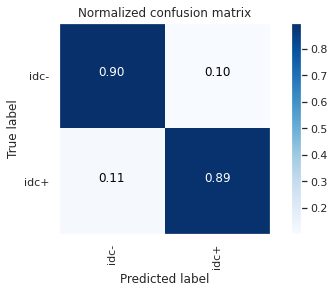

Epoch 9/30
8696/8696 [==============================] - 1095s 126ms/step - loss: 0.2108 - accuracy: 0.9137 - val_loss: 0.2555 - val_accuracy: 0.8935

Epoch 00009: val_accuracy did not improve from 0.89608
Predicting test data
1119/1119 [==============================] - 25s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:25.252643


---------------------
| Balanced Accuracy  |
---------------------

    0.8952442062708599


---------------------
|      Accuracy      |
---------------------

    0.8934659884858309


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.933515  0.886667  0.909488     10800
           1   0.839644  0.903822  0.870551      7091

    accuracy                       0.893466     17891
   macro avg   0.886579  0.895244  0.890020     17891
weighted avg   0.896310  0.893466  0.894056     17891

--------------------
| Confusion Matrix |
--------------------

 [[9576

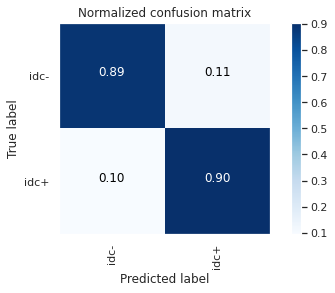

Epoch 10/30
8696/8696 [==============================] - 1096s 126ms/step - loss: 0.2093 - accuracy: 0.9145 - val_loss: 0.2615 - val_accuracy: 0.8896

Epoch 00010: val_accuracy did not improve from 0.89608
Predicting test data
1119/1119 [==============================] - 25s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:25.200158


---------------------
| Balanced Accuracy  |
---------------------

    0.8920761123907718


---------------------
|      Accuracy      |
---------------------

    0.8895534067408194


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.933314  0.879907  0.905824     10800
           1   0.831755  0.904245  0.866486      7091

    accuracy                       0.889553     17891
   macro avg   0.882534  0.892076  0.886155     17891
weighted avg   0.893061  0.889553  0.890233     17891

--------------------
| Confusion Matrix |
--------------------

 [[950

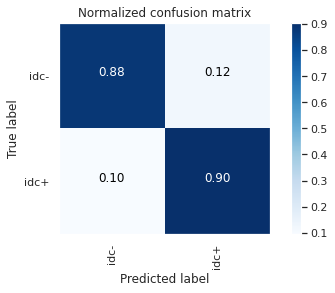

Epoch 11/30
8696/8696 [==============================] - 1086s 125ms/step - loss: 0.2071 - accuracy: 0.9153 - val_loss: 0.2582 - val_accuracy: 0.8931

Epoch 00011: val_accuracy did not improve from 0.89608
Predicting test data
1119/1119 [==============================] - 23s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.488203


---------------------
| Balanced Accuracy  |
---------------------

    0.8948959165765681


---------------------
|      Accuracy      |
---------------------

    0.8930747303113297


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.933385  0.886111  0.909134     10800
           1   0.838963  0.903681  0.870120      7091

    accuracy                       0.893075     17891
   macro avg   0.886174  0.894896  0.889627     17891
weighted avg   0.895962  0.893075  0.893671     17891

--------------------
| Confusion Matrix |
--------------------

 [[957

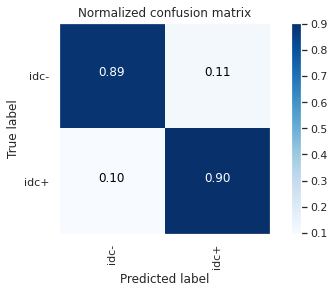

Epoch 12/30
8696/8696 [==============================] - 1108s 127ms/step - loss: 0.2069 - accuracy: 0.9153 - val_loss: 0.2614 - val_accuracy: 0.8914

Epoch 00012: val_accuracy did not improve from 0.89608
Predicting test data
1119/1119 [==============================] - 24s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:40.994152


---------------------
| Balanced Accuracy  |
---------------------

    0.8934849470116005


---------------------
|      Accuracy      |
---------------------

    0.891342015538539


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.933268  0.883148  0.907517     10800
           1   0.835484  0.903822  0.868311      7091

    accuracy                       0.891342     17891
   macro avg   0.884376  0.893485  0.887914     17891
weighted avg   0.894512  0.891342  0.891978     17891

--------------------
| Confusion Matrix |
--------------------

 [[9538

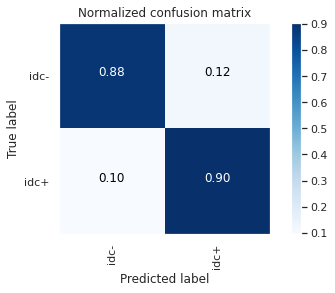

Epoch 13/30
8696/8696 [==============================] - 1099s 126ms/step - loss: 0.2063 - accuracy: 0.9151 - val_loss: 0.2623 - val_accuracy: 0.8929

Epoch 00013: val_accuracy did not improve from 0.89608
Predicting test data
1119/1119 [==============================] - 27s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:26.596600


---------------------
| Balanced Accuracy  |
---------------------

    0.8941537721263783


---------------------
|      Accuracy      |
---------------------

    0.8928511542116148


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.931423  0.887870  0.909125     10800
           1   0.840574  0.900437  0.869476      7091

    accuracy                       0.892851     17891
   macro avg   0.885999  0.894154  0.889301     17891
weighted avg   0.895416  0.892851  0.893411     17891

--------------------
| Confusion Matrix |
--------------------

 [[958

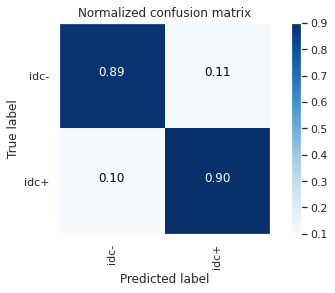

Epoch 14/30
8696/8696 [==============================] - 1102s 127ms/step - loss: 0.2042 - accuracy: 0.9165 - val_loss: 0.2523 - val_accuracy: 0.8965

Epoch 00014: val_accuracy improved from 0.89608 to 0.89647, saving model to best_model_multiclass_128.h5
Predicting test data
1119/1119 [==============================] - 27s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:26.701381


---------------------
| Balanced Accuracy  |
---------------------

    0.893191669669952


---------------------
|      Accuracy      |
---------------------

    0.8964842658319826


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.918600  0.909074  0.913812     10800
           1   0.863668  0.877309  0.870435      7091

    accuracy                       0.896484     17891
   macro avg   0.891134  0.893192  0.892124     17891
weighted avg   0.896828  0.896484  0.896620     17891

--------------------


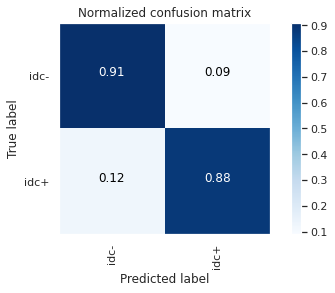

Epoch 15/30
8696/8696 [==============================] - 1103s 127ms/step - loss: 0.2039 - accuracy: 0.9166 - val_loss: 0.2634 - val_accuracy: 0.8941

Epoch 00015: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 28s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:27.626728


---------------------
| Balanced Accuracy  |
---------------------

    0.8945889808155356


---------------------
|      Accuracy      |
---------------------

    0.8941367167849756


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.929412  0.892407  0.910534     10800
           1   0.845499  0.896771  0.870381      7091

    accuracy                       0.894137     17891
   macro avg   0.887456  0.894589  0.890457     17891
weighted avg   0.896154  0.894137  0.894619     17891

--------------------
| Confusion Matrix |
--------------------

 [[963

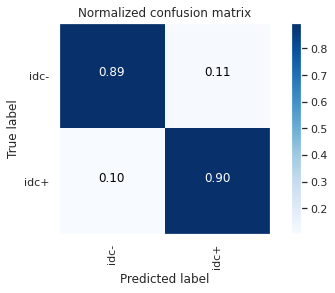

Epoch 16/30
8696/8696 [==============================] - 1109s 127ms/step - loss: 0.2019 - accuracy: 0.9175 - val_loss: 0.2581 - val_accuracy: 0.8941

Epoch 00016: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 25s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:25.164253


---------------------
| Balanced Accuracy  |
---------------------

    0.8940099408744522


---------------------
|      Accuracy      |
---------------------

    0.894080822760047


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.927591  0.894352  0.910668     10800
           1   0.847419  0.893668  0.869929      7091

    accuracy                       0.894081     17891
   macro avg   0.887505  0.894010  0.890299     17891
weighted avg   0.895815  0.894081  0.894521     17891

--------------------
| Confusion Matrix |
--------------------

 [[9659

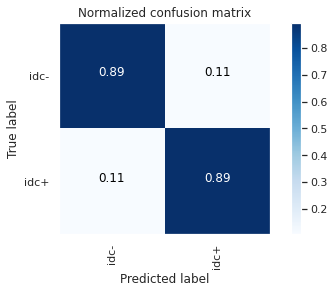

Epoch 17/30
8696/8696 [==============================] - 1093s 126ms/step - loss: 0.2013 - accuracy: 0.9182 - val_loss: 0.2609 - val_accuracy: 0.8932

Epoch 00017: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.548075


---------------------
| Balanced Accuracy  |
---------------------

    0.8931239064124059


---------------------
|      Accuracy      |
---------------------

    0.8931865183611872


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.926986  0.893426  0.909897     10800
           1   0.846164  0.892822  0.868867      7091

    accuracy                       0.893187     17891
   macro avg   0.886575  0.893124  0.889382     17891
weighted avg   0.894953  0.893187  0.893635     17891

--------------------
| Confusion Matrix |
--------------------

 [[964

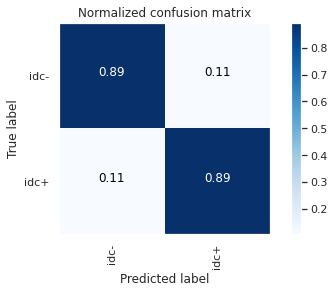

Epoch 18/30
8696/8696 [==============================] - 1088s 125ms/step - loss: 0.2010 - accuracy: 0.9179 - val_loss: 0.2587 - val_accuracy: 0.8956

Epoch 00018: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 23s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.201532


---------------------
| Balanced Accuracy  |
---------------------

    0.8935869281352993


---------------------
|      Accuracy      |
---------------------

    0.8956458554580515


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.922045  0.903519  0.912688     10800
           1   0.857417  0.883655  0.870338      7091

    accuracy                       0.895646     17891
   macro avg   0.889731  0.893587  0.891513     17891
weighted avg   0.896430  0.895646  0.895903     17891

--------------------
| Confusion Matrix |
--------------------

 [[975

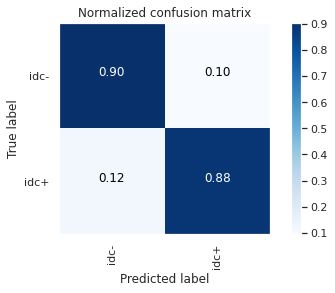

Epoch 19/30
8696/8696 [==============================] - 1086s 125ms/step - loss: 0.1995 - accuracy: 0.9187 - val_loss: 0.2639 - val_accuracy: 0.8938

Epoch 00019: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.647327


---------------------
| Balanced Accuracy  |
---------------------

    0.8948175961181883


---------------------
|      Accuracy      |
---------------------

    0.8938572466603321


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.930958  0.890185  0.910115     10800
           1   0.843205  0.899450  0.870420      7091

    accuracy                       0.893857     17891
   macro avg   0.887081  0.894818  0.890267     17891
weighted avg   0.896177  0.893857  0.894382     17891

--------------------
| Confusion Matrix |
--------------------

 [[961

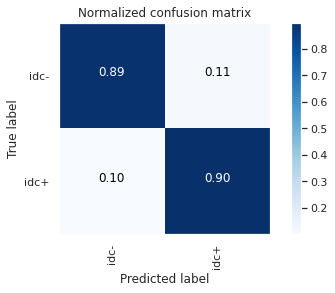

Epoch 20/30
8696/8696 [==============================] - 1086s 125ms/step - loss: 0.1992 - accuracy: 0.9192 - val_loss: 0.2712 - val_accuracy: 0.8893

Epoch 00020: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 27s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:40.993497


---------------------
| Balanced Accuracy  |
---------------------

    0.8924500214147302


---------------------
|      Accuracy      |
---------------------

    0.8892739366161757


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.935420  0.877130  0.905338     10800
           1   0.829083  0.907770  0.866644      7091

    accuracy                       0.889274     17891
   macro avg   0.882252  0.892450  0.885991     17891
weighted avg   0.893274  0.889274  0.890002     17891

--------------------
| Confusion Matrix |
--------------------

 [[947

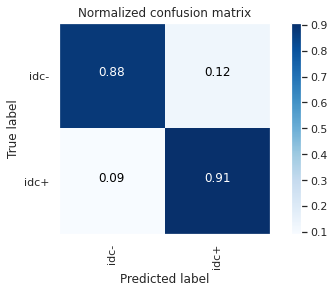

Epoch 21/30
8696/8696 [==============================] - 1086s 125ms/step - loss: 0.1978 - accuracy: 0.9194 - val_loss: 0.2676 - val_accuracy: 0.8900

Epoch 00021: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.535941


---------------------
| Balanced Accuracy  |
---------------------

    0.891088273084818


---------------------
|      Accuracy      |
---------------------

    0.890056452965178


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.928495  0.886111  0.906808     10800
           1   0.837816  0.896065  0.865963      7091

    accuracy                       0.890056     17891
   macro avg   0.883156  0.891088  0.886385     17891
weighted avg   0.892555  0.890056  0.890619     17891

--------------------
| Confusion Matrix |
--------------------

 [[9570 

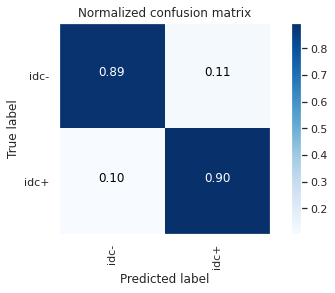

Epoch 22/30
8696/8696 [==============================] - 1087s 125ms/step - loss: 0.1964 - accuracy: 0.9201 - val_loss: 0.2584 - val_accuracy: 0.8956

Epoch 00022: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.538860


---------------------
| Balanced Accuracy  |
---------------------

    0.894436609787054


---------------------
|      Accuracy      |
---------------------

    0.8955899614331227


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.925010  0.900000  0.912333     10800
           1   0.853718  0.888873  0.870941      7091

    accuracy                       0.895590     17891
   macro avg   0.889364  0.894437  0.891637     17891
weighted avg   0.896754  0.895590  0.895928     17891

--------------------
| Confusion Matrix |
--------------------

 [[9720

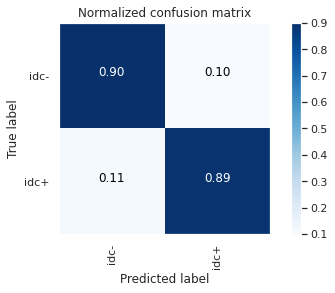

Epoch 23/30
8696/8696 [==============================] - 1085s 125ms/step - loss: 0.1966 - accuracy: 0.9189 - val_loss: 0.2681 - val_accuracy: 0.8904

Epoch 00023: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.608956


---------------------
| Balanced Accuracy  |
---------------------

    0.8936444541071886


---------------------
|      Accuracy      |
---------------------

    0.8903359230898217


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.936660  0.877685  0.906214     10800
           1   0.830009  0.909604  0.867985      7091

    accuracy                       0.890336     17891
   macro avg   0.883335  0.893644  0.887100     17891
weighted avg   0.894390  0.890336  0.891062     17891

--------------------
| Confusion Matrix |
--------------------

 [[947

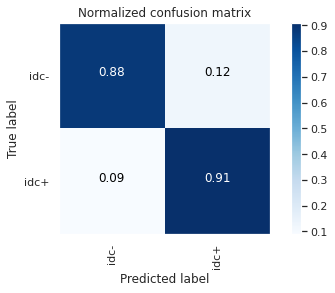

Epoch 24/30
8696/8696 [==============================] - 1090s 125ms/step - loss: 0.1947 - accuracy: 0.9200 - val_loss: 0.2814 - val_accuracy: 0.8837

Epoch 00024: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.680118


---------------------
| Balanced Accuracy  |
---------------------

    0.8871644350950867


---------------------
|      Accuracy      |
---------------------

    0.883740428148231


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.932282  0.870648  0.900412     10800
           1   0.821012  0.903681  0.860365      7091

    accuracy                       0.883740     17891
   macro avg   0.876647  0.887164  0.880388     17891
weighted avg   0.888181  0.883740  0.884540     17891

--------------------
| Confusion Matrix |
--------------------

 [[9403

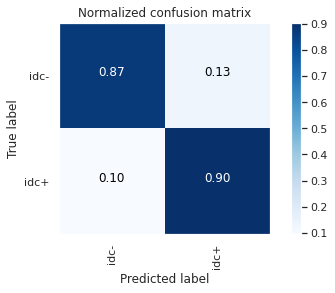

Epoch 25/30
8696/8696 [==============================] - 1099s 126ms/step - loss: 0.1938 - accuracy: 0.9210 - val_loss: 0.2570 - val_accuracy: 0.8958

Epoch 00025: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.962262


---------------------
| Balanced Accuracy  |
---------------------

    0.8928782703165724


---------------------
|      Accuracy      |
---------------------

    0.8958135375328378


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.919294  0.907037  0.913125     10800
           1   0.861230  0.878720  0.869887      7091

    accuracy                       0.895814     17891
   macro avg   0.890262  0.892878  0.891506     17891
weighted avg   0.896281  0.895814  0.895988     17891

--------------------
| Confusion Matrix |
--------------------

 [[979

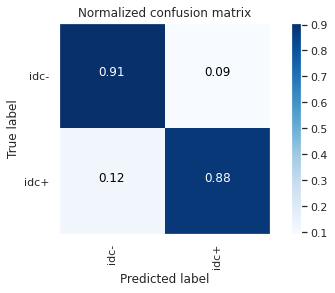

Epoch 26/30
8696/8696 [==============================] - 1107s 127ms/step - loss: 0.1936 - accuracy: 0.9210 - val_loss: 0.2728 - val_accuracy: 0.8920

Epoch 00026: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.999780


---------------------
| Balanced Accuracy  |
---------------------

    0.8935804057830218


---------------------
|      Accuracy      |
---------------------

    0.8920127438376837


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.931743  0.886019  0.908306     10800
           1   0.838473  0.901142  0.868679      7091

    accuracy                       0.892013     17891
   macro avg   0.885108  0.893580  0.888492     17891
weighted avg   0.894776  0.892013  0.892600     17891

--------------------
| Confusion Matrix |
--------------------

 [[956

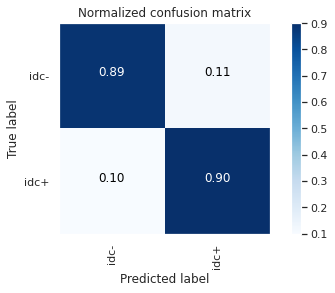

Epoch 27/30
8696/8696 [==============================] - 1104s 127ms/step - loss: 0.1928 - accuracy: 0.9208 - val_loss: 0.2916 - val_accuracy: 0.8918

Epoch 00027: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:40.988820


---------------------
| Balanced Accuracy  |
---------------------

    0.8915548334612994


---------------------
|      Accuracy      |
---------------------

    0.8917891677379688


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.925418  0.892685  0.908757     10800
           1   0.844908  0.890424  0.867069      7091

    accuracy                       0.891789     17891
   macro avg   0.885163  0.891555  0.887913     17891
weighted avg   0.893508  0.891789  0.892234     17891

--------------------
| Confusion Matrix |
--------------------

 [[964

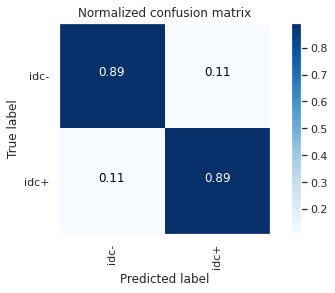

Epoch 28/30
8696/8696 [==============================] - 1104s 127ms/step - loss: 0.1910 - accuracy: 0.9218 - val_loss: 0.2805 - val_accuracy: 0.8885

Epoch 00028: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.028290


---------------------
| Balanced Accuracy  |
---------------------

    0.8886032764537206


---------------------
|      Accuracy      |
---------------------

    0.8885473142921022


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.924099  0.888333  0.905863     10800
           1   0.839393  0.888873  0.863425      7091

    accuracy                       0.888547     17891
   macro avg   0.881746  0.888603  0.884644     17891
weighted avg   0.890526  0.888547  0.889043     17891

--------------------
| Confusion Matrix |
--------------------

 [[959

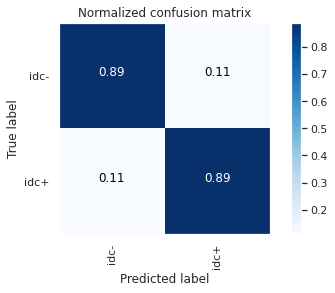

Epoch 29/30
8696/8696 [==============================] - 1105s 127ms/step - loss: 0.1905 - accuracy: 0.9222 - val_loss: 0.3573 - val_accuracy: 0.8911

Epoch 00029: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 24s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.593810


---------------------
| Balanced Accuracy  |
---------------------

    0.8893041844905123


---------------------
|      Accuracy      |
---------------------

    0.891118439438824


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.919685  0.898056  0.908742     10800
           1   0.850102  0.880553  0.865060      7091

    accuracy                       0.891118     17891
   macro avg   0.884894  0.889304  0.886901     17891
weighted avg   0.892106  0.891118  0.891429     17891

--------------------
| Confusion Matrix |
--------------------

 [[9699

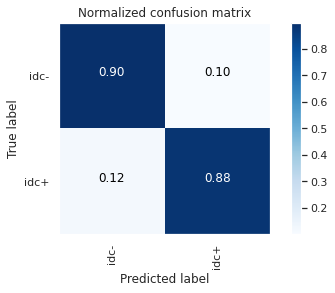

Epoch 30/30
8696/8696 [==============================] - 1103s 127ms/step - loss: 0.1892 - accuracy: 0.9229 - val_loss: 0.3047 - val_accuracy: 0.8882

Epoch 00030: val_accuracy did not improve from 0.89647
Predicting test data
1119/1119 [==============================] - 31s 28ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:31.412712


---------------------
| Balanced Accuracy  |
---------------------

    0.8891751803276976


---------------------
|      Accuracy      |
---------------------

    0.8881560561176011


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.927094  0.884259  0.905170     10800
           1   0.835310  0.894091  0.863701      7091

    accuracy                       0.888156     17891
   macro avg   0.881202  0.889175  0.884436     17891
weighted avg   0.890716  0.888156  0.888734     17891

--------------------
| Confusion Matrix |
--------------------

 [[955

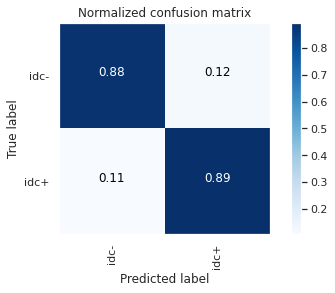

In [39]:
'''
#using augmentation data
history = model.fit_generator(train_generator, 
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              class_weight =class_weights,
                              epochs = 70,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )
#using raw data
history = model.fit_generator(train_data_label, 
                              steps_per_epoch = epoch_step,
                              validation_data=train_val_data,
                              epochs = 70,
                              validation_steps= val_step, 
                              class_weight =class_weights,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )


epoch_step = (len(train_data) // 16)
print(epoch_step)
val_step=len(test_data)// 16
print(val_step)
train_val_data=(test_data, test_label)
#print(train_generator.shape)
train_data_label=(train_data,train_label)
#print(val_generator.shape)
#(self, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, validation_freq, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch)

history = model.fit_generator( 
                        train_datagen.flow(train_data,train_label),
                        steps_per_epoch=epoch_step,
                        epochs = 70,
                        verbose = 1,
                        callbacks = get_callbacks(),
                        validation_data=(test_data,test_label),
                        validation_steps = val_step,
                        class_weight =weights
                        )

'''
#from keras.models import load_model
model.load_weights('/kaggle/input/covxnet-oversample/221227 120000 train 1 aug 3 train.h5')
print("load weight success")
model.trainable=True

history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              epochs = epoch_4_test,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )

# Loading Best Model

In [40]:
from keras.models import load_model
#best_model = load_model('./best_model_multiclass_128.h5')
model1 = load_model('./best_model_multiclass_128.h5', compile=False)

# Best Model Performance
def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):

analyse of best model
VAL kappa
0.7927150474314225
analyse 1st model
report of val data
              precision    recall  f1-score   support

           0   0.925085  0.908492  0.916713     25200
           1   0.864329  0.887942  0.875976     16545

    accuracy                       0.900347     41745
   macro avg   0.894707  0.898217  0.896345     41745
weighted avg   0.901005  0.900347  0.900568     41745



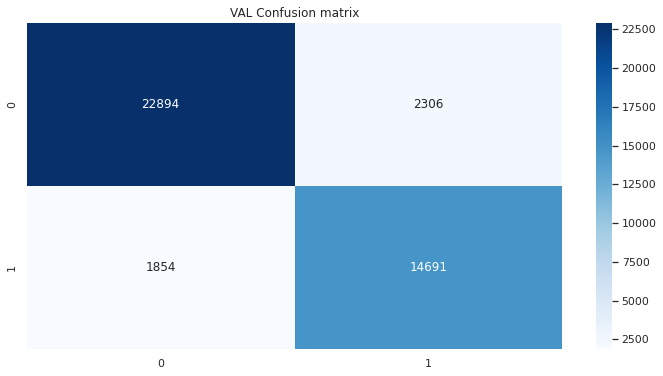

In [41]:
import sklearn
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
#---------------
from keras.models import load_model

#model1 = load_model('./best_model_multiclass_128.h5', compile=False)
print("analyse of best model")


cf_matrix_val = confusion_matrix(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_val, annot=True, cmap='Blues', fmt='g')
plt.title("VAL Confusion matrix")
# kappa VAL
kappa_val = cohen_kappa_score(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)
print("VAL kappa")
print(kappa_val)



print("analyse 1st model")
print("report of val data")
report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) , digits=6
)
print(report)

report of test data
              precision    recall  f1-score   support

           0  0.9186003 0.9090741 0.9138124     10800
           1  0.8636679 0.8773093 0.8704351      7091

    accuracy                      0.8964843     17891
   macro avg  0.8911341 0.8931917 0.8921238     17891
weighted avg  0.8968281 0.8964843 0.8966200     17891

TEST kappa
0.7842563189844411


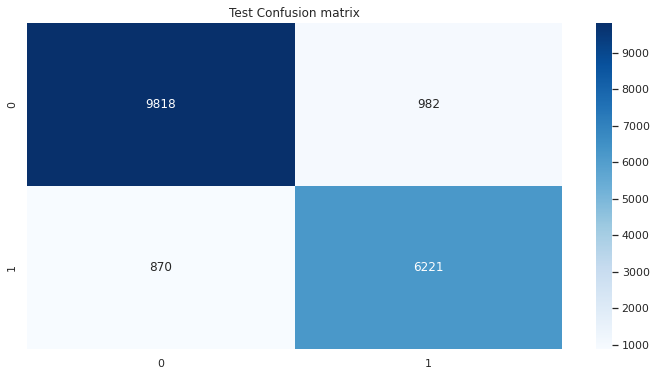

In [42]:
#------------------
cf_matrix_test = confusion_matrix(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title("Test Confusion matrix")



print("report of test data")
import sklearn

report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) , digits=7
)
print(report)


# kappa TEST
kappa_test = cohen_kappa_score(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1)
)
print("TEST kappa")
print(kappa_test)

roc analysis of test dataset


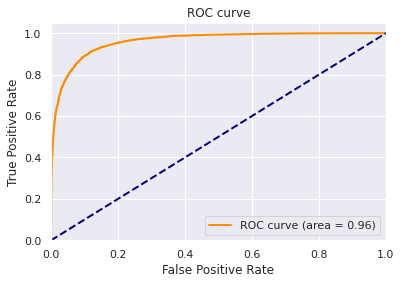

auc value
0.9612746791707799


In [43]:
print("roc analysis of test dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

roc analysis of validation dataset


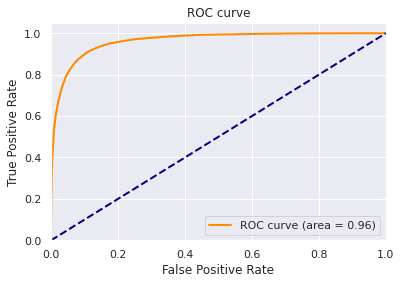

auc value
0.9625335112991507


In [44]:
print("roc analysis of validation dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val2_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

2610/2610 [==============================] - 55s 21ms/step
validation auc
0.8982170199599937
validation roc


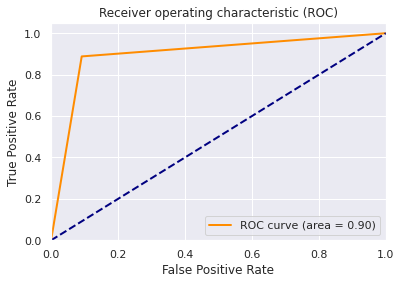

In [45]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras= model1.predict_generator(val2_generator,verbose=1)
#.ravel()
y_pred_keras=np.argmax(y_pred_keras,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

val_label2=np.argmax(val_label, axis=1)
#print(test_label2)
#print(len(test_label2))

#fpr_keras, tpr_keras, thresholds_keras = roc_curve(val_label2, y_pred_keras)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(val_label2, y_pred_keras
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("validation auc")
print(roc_auc)

print("validation roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

1119/1119 [==============================] - 24s 21ms/step
test auc
0.8931916696699521
test roc


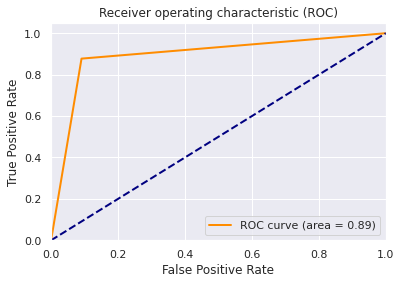

In [46]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras2= model1.predict_generator(val_generator,verbose=1)
#.ravel()
y_pred_keras2=np.argmax(y_pred_keras2,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

test_label2=np.argmax(test_label, axis=1)
#print(test_label2)
#print(len(test_label2))

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label2, y_pred_keras2)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(test_label2, y_pred_keras2
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("test auc")
print(roc_auc)
print("test roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [47]:
'''

#must use train_label1 as train_label went through a shuffle in image-data-generator
test_final_model(best_model, train_generator, 
               val_generator, val2_generator, 
               np.argmax(train_label1, axis=1),
               np.argmax(test_label, axis=1),
               np.argmax(val_label, axis=1), 
               class_labels = ['idc-', 'idc+'])
               '''

"\n\n#must use train_label1 as train_label went through a shuffle in image-data-generator\ntest_final_model(best_model, train_generator, \n               val_generator, val2_generator, \n               np.argmax(train_label1, axis=1),\n               np.argmax(test_label, axis=1),\n               np.argmax(val_label, axis=1), \n               class_labels = ['idc-', 'idc+'])\n               "

# Plotting EpochPlot

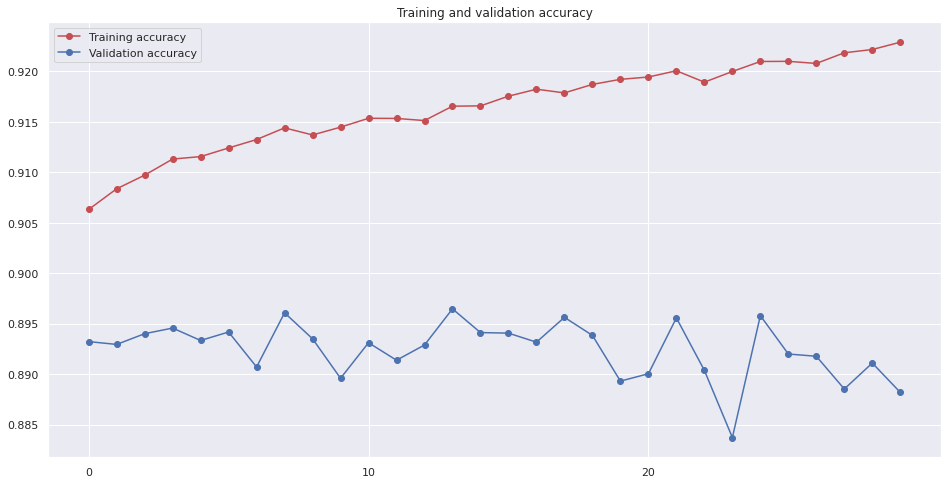

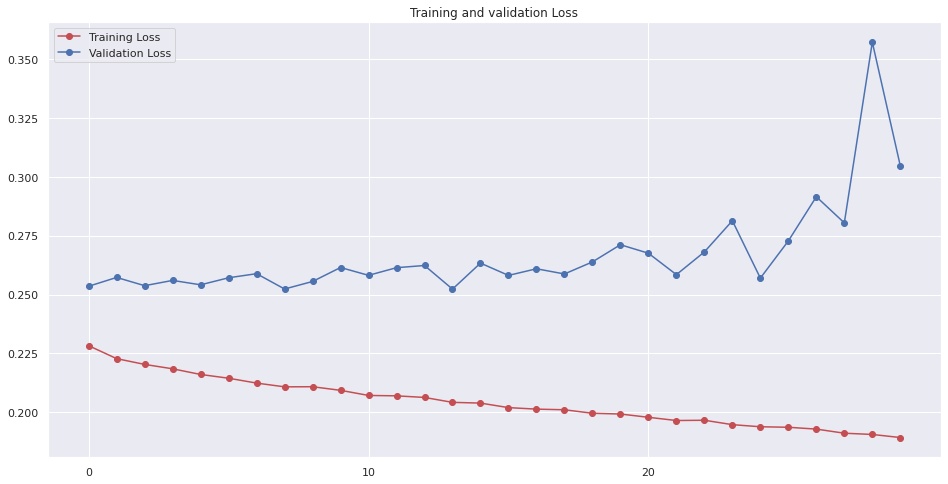

<Figure size 432x288 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(0,len(acc))
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, loss, 'r', label='Training Loss',marker = "o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',marker = "o")
plt.title('Training and validation Loss')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()


In [49]:
#print(y_test)

from sklearn.cross_validation import train_test_split# Grad-CAM and Saliency Map 
coming soon....